In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

cwd = os.getcwd()

basedir = os.path.abspath(os.path.join(cwd, os.pardir))
if basedir not in sys.path:
    sys.path.insert(0, basedir)


plt.rcParams.update({
    'figure.figsize': (16, 4),
    'font.size': 16,
    'lines.linewidth': 1.5
})

datadir = os.path.join(basedir, 'vessel_data/CSAD')
files = os.listdir(datadir)
filepaths = [os.path.join(datadir, f) for f in files if f.endswith('.mat')]

# Note that the vesselABC file does not seem to be needed. Don't know what it has been used for. 


In [2]:
data = {files[i].split('.mat')[0]: loadmat(filepaths[i]) for i in range(len(filepaths))}

In [3]:
QTF_diag_surge = np.asarray(data['CSAD_model']['vessel']['driftfrc'][0, 0]['amp'][0, 0][0, 0][:, :, 0])
QTF_diag_sway = np.asarray(data['CSAD_model']['vessel']['driftfrc'][0, 0]['amp'][0, 0][0, 1][:, :, 0])
QTF_diag_heave = np.asarray(data['CSAD_model']['vessel']['driftfrc'][0, 0]['amp'][0, 0][0, 2][:, :, 0])
QTF_diag_roll = np.asarray(data['CSAD_model']['vessel']['driftfrc'][0, 0]['amp'][0, 0][0, 3][:, :, 0])
QTF_diag_pitch = np.asarray(data['CSAD_model']['vessel']['driftfrc'][0, 0]['amp'][0, 0][0, 4][:, :, 0])
QTF_diag_yaw = np.asarray(data['CSAD_model']['vessel']['driftfrc'][0, 0]['amp'][0, 0][0, 5][:, :, 0])

In [4]:
QTF_diag_surge_beta0 = QTF_diag_surge[:, 0].copy()
QTF_diag_surge_beta36 = QTF_diag_surge[:, 35].copy()

In [5]:
data['CSAD_model']['vessel']['driftfrc'][0,0]['amp'][0,0][0, 1][:, :, 0].shape

(47, 36)

In [6]:
freqs = np.asarray(data['CSAD_model']['vessel']['driftfrc'][0, 0]['w'][0,0][0, :])
headings = np.asarray(data['CSAD_model']['vessel']['headings'][0, 0][0, :])

In [7]:
# Test out algorithm used by Brørby for selecting angle. 
np.degrees(headings[np.argmin(np.abs(headings - np.deg2rad(15.)))])

10.0

In [8]:
from waves.wave_loads import WaveLoad

In [9]:
wave_freqs = np.linspace(0.5, 7, 50)

waveload = WaveLoad(np.linspace(0, 2.5, len(wave_freqs)), wave_freqs, np.random.uniform(0, 6.28, size=len(freqs)), headings, 0)

qtf_diag_surge = np.asarray(data['CSAD_model']['vessel']['driftfrc'][0, 0]['amp'][0, 0][0, 0][:, :, :])

In [10]:
full_qtf_surge_heading0 = waveload._full_qtf(headings, freqs, qtf_diag_surge, 0, method="")


Execution time of _full_qtf: 0.0269


In [11]:
print(full_qtf_surge_heading0)

[[1.74824926e-03 2.79718314e-03 4.54245880e-03 ... 2.02929098e+00
  1.32182174e+00 1.32182174e+00]
 [2.79718314e-03 4.47546796e-03 7.26789337e-03 ... 3.24684739e+00
  2.11490294e+00 2.11490294e+00]
 [4.54245880e-03 7.26789337e-03 1.18026259e-02 ... 5.27268675e+00
  3.43447639e+00 3.43447639e+00]
 ...
 [2.02929098e+00 3.24684739e+00 5.27268675e+00 ... 2.35551188e+03
  1.53431264e+03 1.53431264e+03]
 [1.32182174e+00 2.11490294e+00 3.43447639e+00 ... 1.53431264e+03
  9.99407097e+02 9.99407097e+02]
 [1.32182174e+00 2.11490294e+00 3.43447639e+00 ... 1.53431264e+03
  9.99407097e+02 9.99407097e+02]]


In [12]:
QTF_diag_surge_beta0

array([4.86661285e-05, 1.01960638e-04, 2.52622544e-04, 3.11623371e-04,
       3.89088820e-04, 4.91090980e-04, 6.29965484e-04, 7.17648219e-04,
       8.21388885e-04, 9.44606830e-04, 1.09291433e-03, 1.26851816e-03,
       1.48405153e-03, 1.74824926e-03, 2.07429047e-03, 2.48005235e-03,
       2.98809474e-03, 3.64012335e-03, 4.47546796e-03, 5.59009633e-03,
       7.04724367e-03, 9.04477379e-03, 1.18026259e-02, 1.57227635e-02,
       2.14435362e-02, 3.01072378e-02, 4.37648608e-02, 6.64250444e-02,
       1.06324207e-01, 1.82583235e-01, 3.45914483e-01, 7.55869233e-01,
       2.06969239e+00, 2.63168924e+00, 4.12212272e+00, 6.84665024e+00,
       1.20650551e+01, 2.28807072e+01, 4.64502815e+01, 1.01643078e+02,
       2.34535457e+02, 5.54521501e+02, 1.23450924e+03, 2.06632456e+03,
       2.35551188e+03, 9.99407097e+02, 1.78730223e+02])

In [13]:
m = np.array([
    [1, 0],
    [0, 0]
])

t = 0

m = m*t

np.exp(m)

array([[1., 1.],
       [1., 1.]])

In [14]:
# Antall bølge frekvenser
a1, a2 = 1, 2
w1, w2 = 1, 0.5
p1, p2 = 0, 1

np.random.seed(25)
N = 100 # Number of wave components
w = np.random.random(size=N*N)
a = np.random.random(size=N)
p = np.random.random(size=N*N)

# Q = np.array([
#     [0.5, 0.75],
#     [0.75, 1]
# ])
# Random QTF
Q = np.random.random(size=N*N).reshape(N, N)

A = a.copy()

W = np.zeros_like(Q)
P = np.zeros_like(Q)
for i in range(N):
    for j in range(N):
        W[i, j] = w[i] - w[j]
        P[i, j] = p[i] - p[j]



t = 0
from time import time
t1 = time()
res = np.real(A.T@(Q*np.exp(W*(1j*t) + P))@A)
t2 = time()
print(f"Result: {res}")
print(f"Execution time {1000*(t2 - t1)} [ms]")

Result: 1327.2243838296745
Execution time 6.981849670410156 [ms]


In [15]:
res = 0
t1 = time()
for i in range(N):
    for j in range(N):
        Qij = Q[i, j]
        res += a[i]*a[j]*Qij*np.exp(1j*(w[i]-w[j])*t + (p[i] - p[j]))

t2 = time()
print(f"Result: {np.real(res)}")
print(f"Execution time: {1000*(t2 - t1):.2f} [ms]")



Result: 1327.2243838296747
Execution time: 56.85 [ms]


In [16]:
np.cos([
    [np.pi/2, 0],
    [0, np.pi/2]
])

array([[6.123234e-17, 1.000000e+00],
       [1.000000e+00, 6.123234e-17]])

In [20]:
import json

file = os.path.join(datadir, 'vessel_json.json')
with open(file, 'r') as f:
    vesseldata = json.load(f)

Mrb = np.asarray(vesseldata['MRB'])
A = np.asarray(vesseldata['A'])
D = np.asarray(vesseldata['B'])
C = np.asarray(vesseldata['C'])
freqs = np.asarray(vesseldata['freqs'])
heading = np.asarray(vesseldata['headings'])

In [61]:
def plot_6_dof_params(freqs, arr, name):
    plt.rcParams.update({'font.size': 10})
    fig, axs = plt.subplots(6, 6, figsize=(16, 16))
    for i in range(6):
        for j in range(6):
            plt.sca(axs[i, j])
            plt.plot(freqs, arr[i, j, :], label=r"${}_{}$".format(name, "{" + f"{i+1}"+f"{j+1}" +"}"))
            plt.legend()
    plt.show()


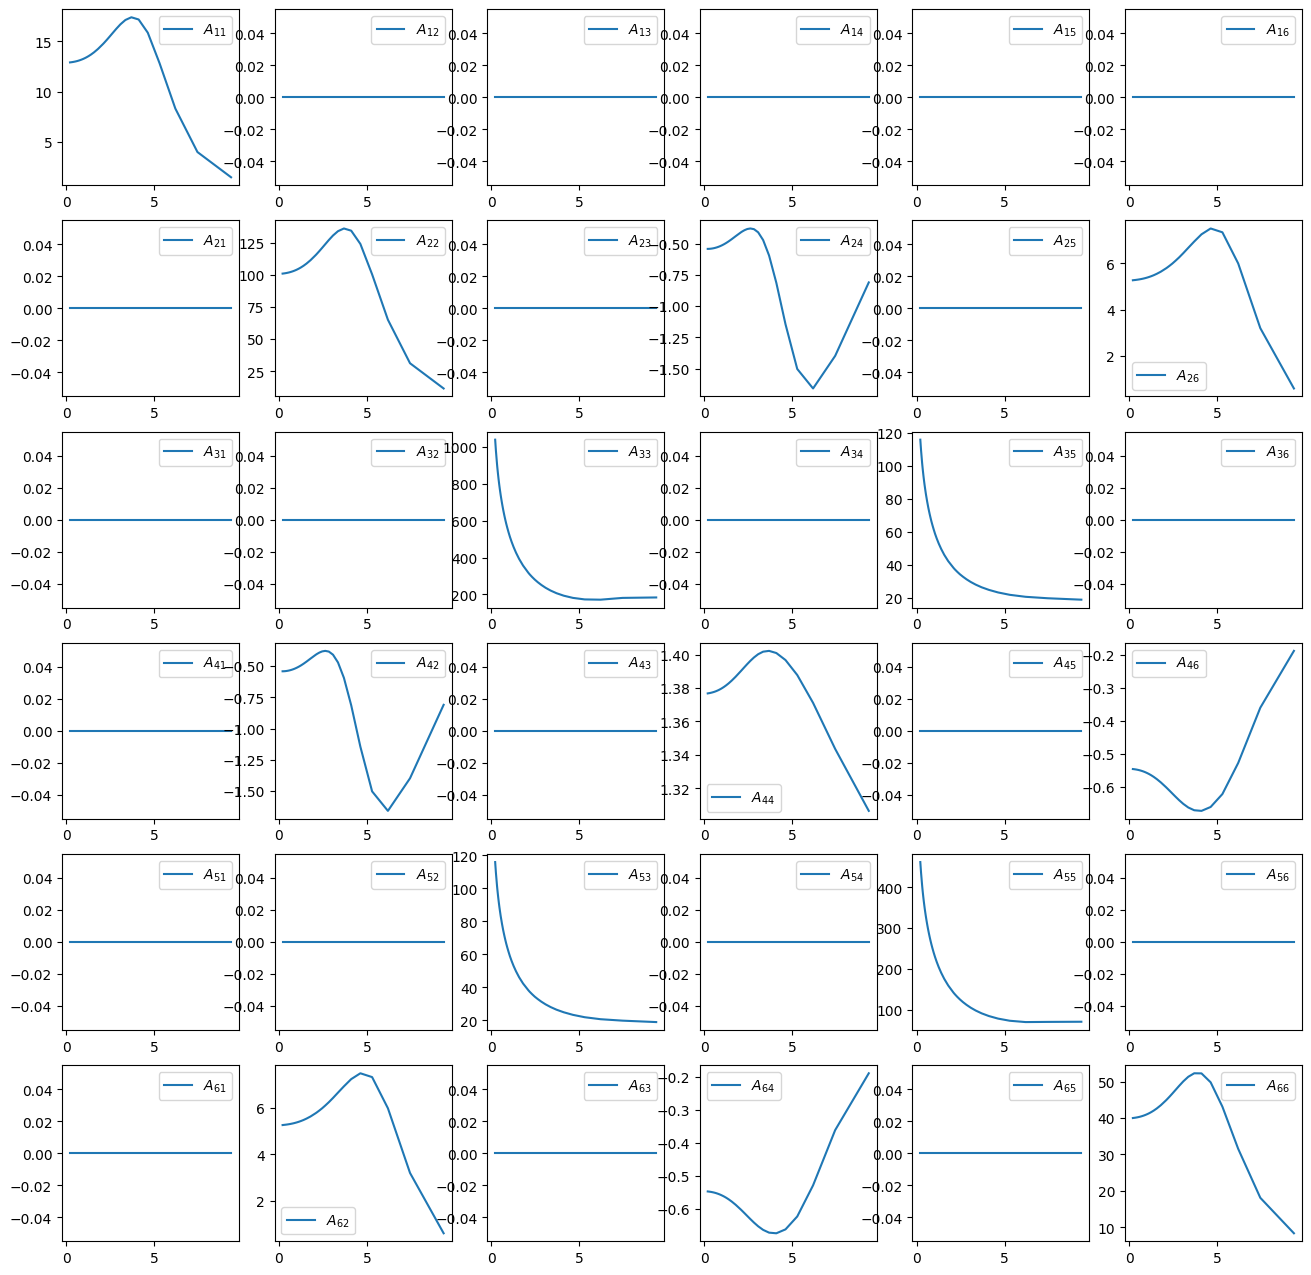

In [62]:
plot_6_dof_params(freqs, A, 'A')

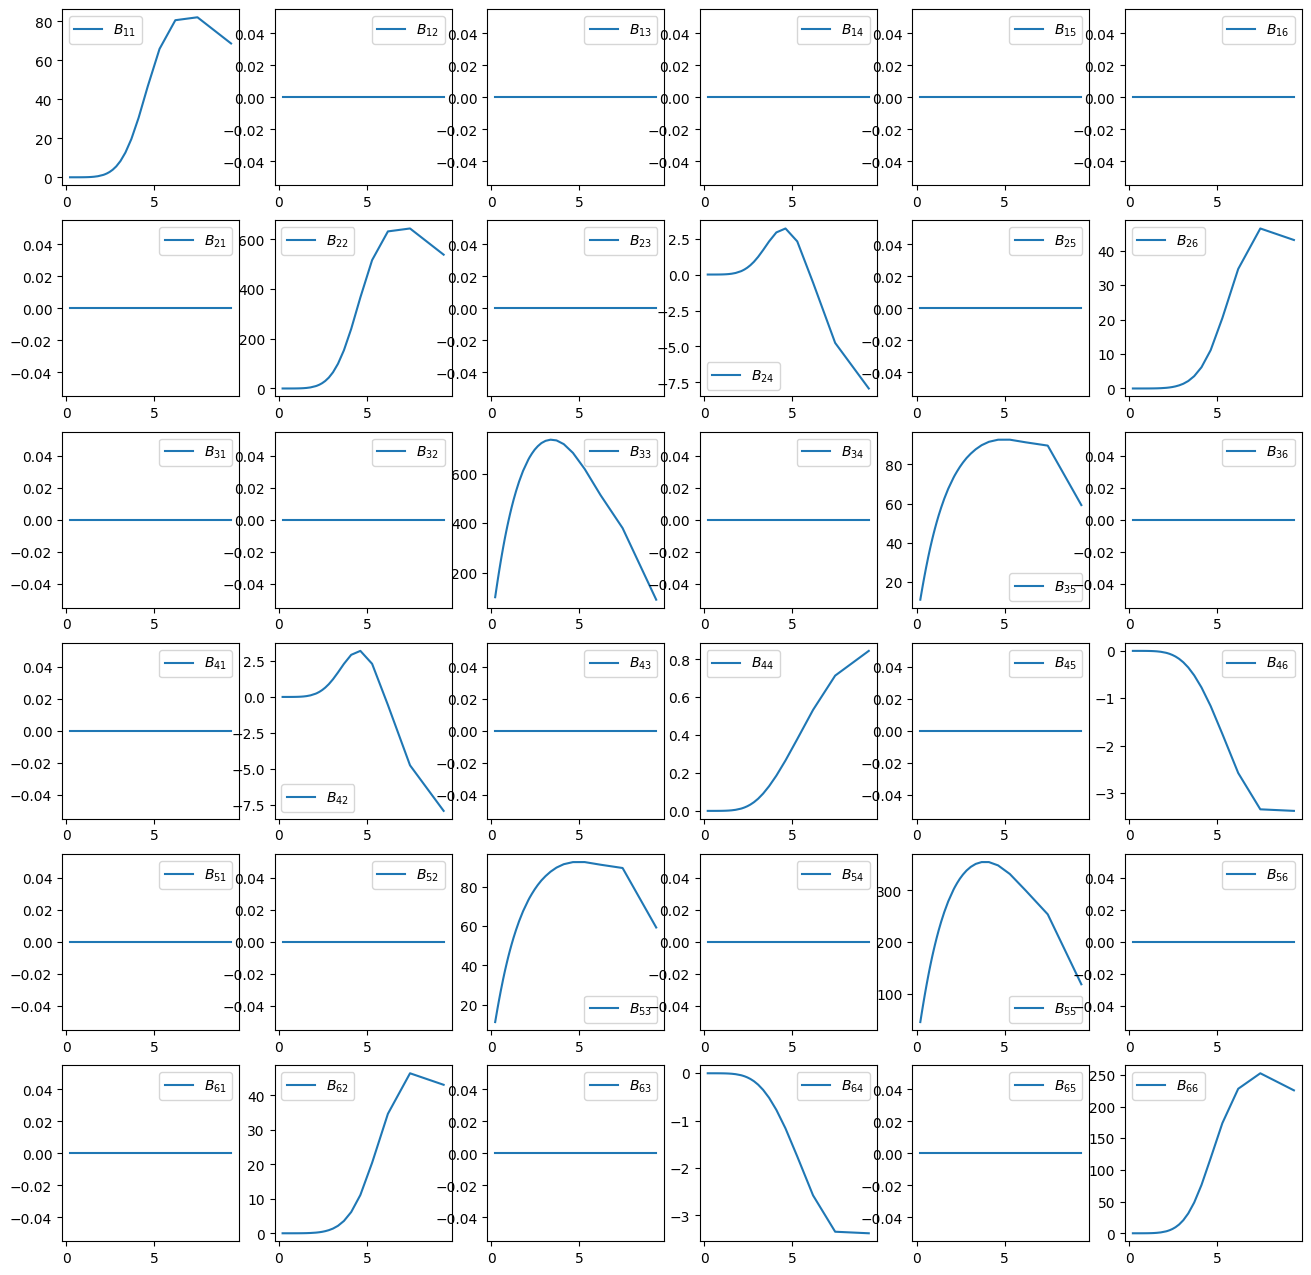

In [63]:
plot_6_dof_params(freqs, D, "B")

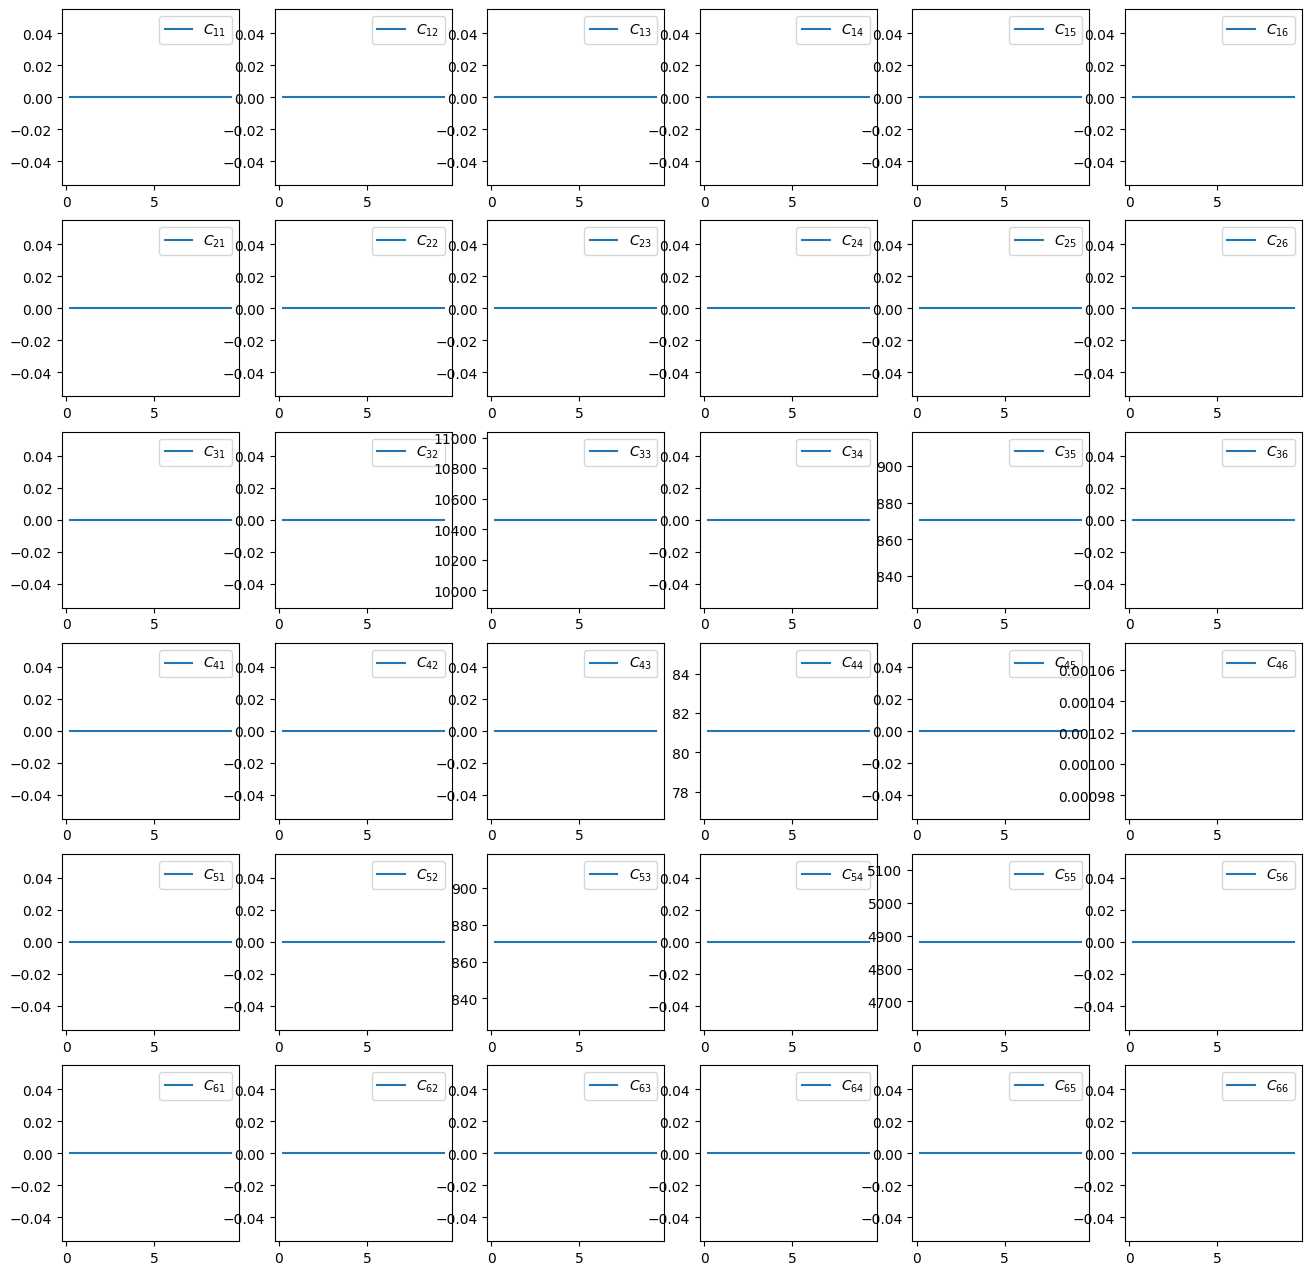

In [64]:
plot_6_dof_params(freqs, C, "C")

In [65]:
vesseldata.keys()

dict_keys(['main', 'MRB', 'A', 'B', 'C', 'roll', 'freqs', 'headings', 'velocities', 'Bv', 'forceRAO', 'motionRAO', 'driftfrc'])

In [184]:
print(np.argmax(D[3, 3, :]))


46


In [96]:
Bv44 = np.asarray(vesseldata['roll']['Bv44'])
Bv44V = np.asarray(vesseldata['roll']['veres'])
Bv44V.shape

(1, 3, 47)

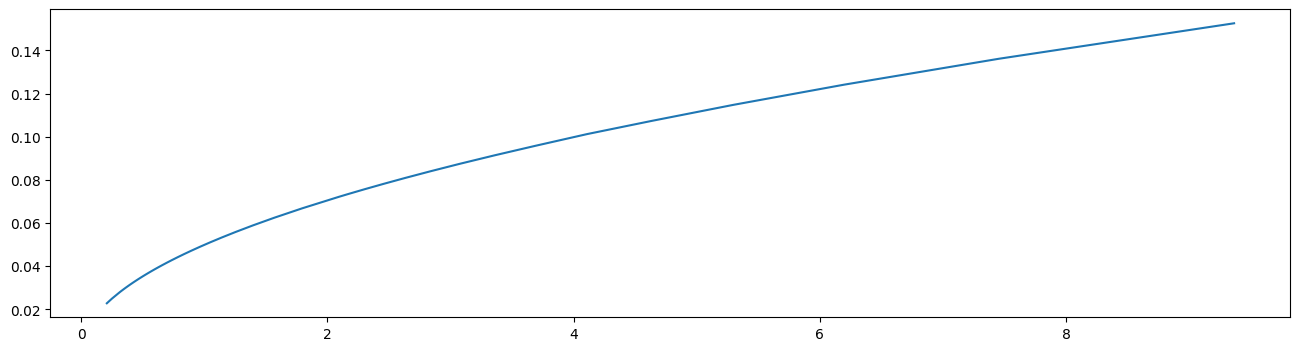

In [86]:
plt.plot(freqs, Bv44)
plt.show()

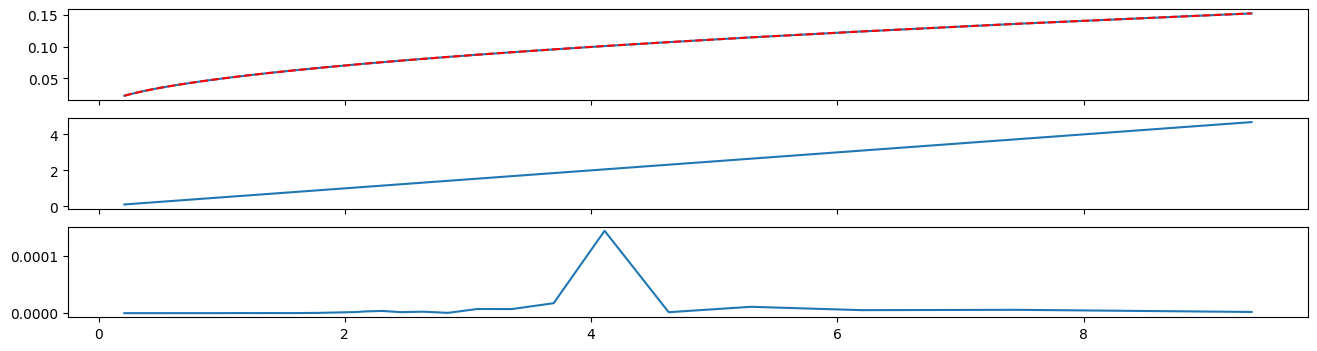

In [88]:
fig, axs = plt.subplots(3, 1, sharex=True)
for i in range(3):
    plt.sca(axs[i])
    plt.plot(freqs, Bv44V[i])
plt.sca(axs[0])
plt.plot(freqs, Bv44, 'r--')
plt.show()

In [90]:
vesseldata['Bv']

[[16.43328120994398, 0, 0, 0, 0, 0],
 [0, 128.774182, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1.5348917630125603, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 50.508194]]

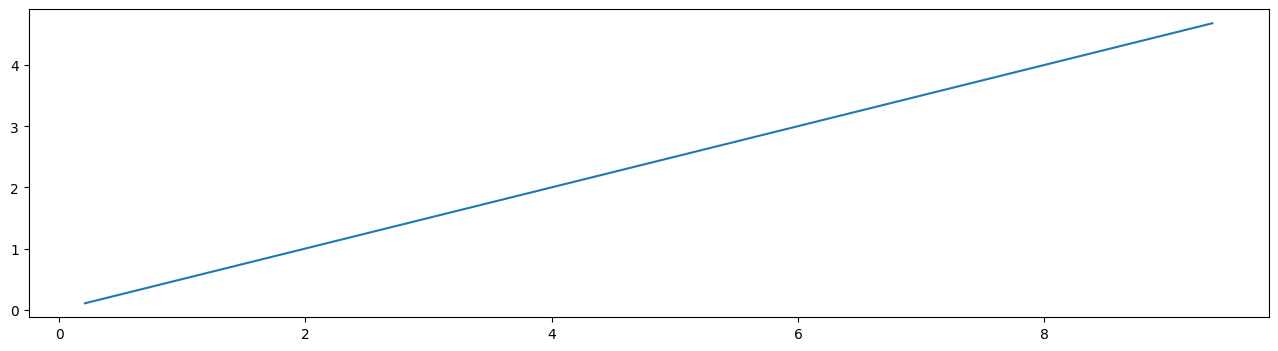

In [98]:
plt.plot(freqs, Bv44V[0, 1])

In [108]:
np.asarray(vesseldata['Bv'])

array([[ 16.43328121,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        , 128.774182  ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   1.53489176,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  50.508194  ]])

In [112]:
print(np.round(D[:, :, -1] + vesseldata['Bv'], 2))

[[ 85.15   0.     0.     0.     0.     0.  ]
 [  0.   667.22   0.    -7.92   0.    43.09]
 [  0.     0.    91.31   0.    59.29   0.  ]
 [  0.    -7.92   0.     2.38   0.    -3.38]
 [  0.     0.    59.29   0.   118.12   0.  ]
 [  0.    43.09   0.    -3.38   0.   276.11]]


In [113]:
vesseldata['main']

{'g': 9.8100004,
 'Lpp': 2.5780001,
 'T': 0.133,
 'B': 0.44400001,
 'rho': 1025,
 'CG': [0.043288097, 0, 0.133],
 'm': 127.51217,
 'k44': 0.15600000328978147,
 'k55': 0.6959999811674498,
 'k66': 0.6960000037030497,
 'nabla': 0.12440211707317073,
 'name': 'CSAD_model',
 'GM_L': 3.902,
 'GM_T': 0.065,
 'C_B': 0.817,
 'CB': [0.04299995000000001, 0, 0.069],
 'Lwl': 2.5780001,
 'S': 1.262736072840001}

In [114]:
g44 = vesseldata['main']['g']*vesseldata['main']['rho']*vesseldata['main']['nabla']*vesseldata['main']['GM_T']

In [115]:
g44

81.30813851581642

In [117]:
np.array(vesseldata['C'])[3, 3, 0]

81.093613

In [158]:
w44 = np.sqrt(g44/(vesseldata['MRB'][3][3] + vesseldata['A'][3][3][ind]))

In [159]:
ind = np.argmin(np.abs(freqs - w44))

In [160]:
freqs[ind]

4.109343

In [170]:
b44_est = 2*np.pi*np.sqrt(vesseldata['MRB']))

1.7487717262334666

In [176]:
vesseldata['roll']['veres'][0][1]

[0.10479847,
 0.12575836,
 0.15719758,
 0.16547081,
 0.17466334,
 0.18493785,
 0.19649614,
 0.20283501,
 0.20959598,
 0.21682324,
 0.22456698,
 0.23288409,
 0.24184093,
 0.25151506,
 0.2619943,
 0.27338579,
 0.28581193,
 0.29942209,
 0.31439325,
 0.33094004,
 0.34932542,
 0.36987409,
 0.39299107,
 0.41919017,
 0.44913241,
 0.48368078,
 0.52398747,
 0.57162279,
 0.62878501,
 0.69864959,
 0.78598118,
 0.89826459,
 1.0479736,
 1.0841116,
 1.1520419,
 1.2295353,
 1.3176535,
 1.4200189,
 1.5388752,
 1.6803411,
 1.8493646,
 2.0561934,
 2.3168159,
 2.6508615,
 3.100512,
 3.7294428,
 4.6854243]